In [3]:
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [4]:
X = dataset.data
y = dataset.target

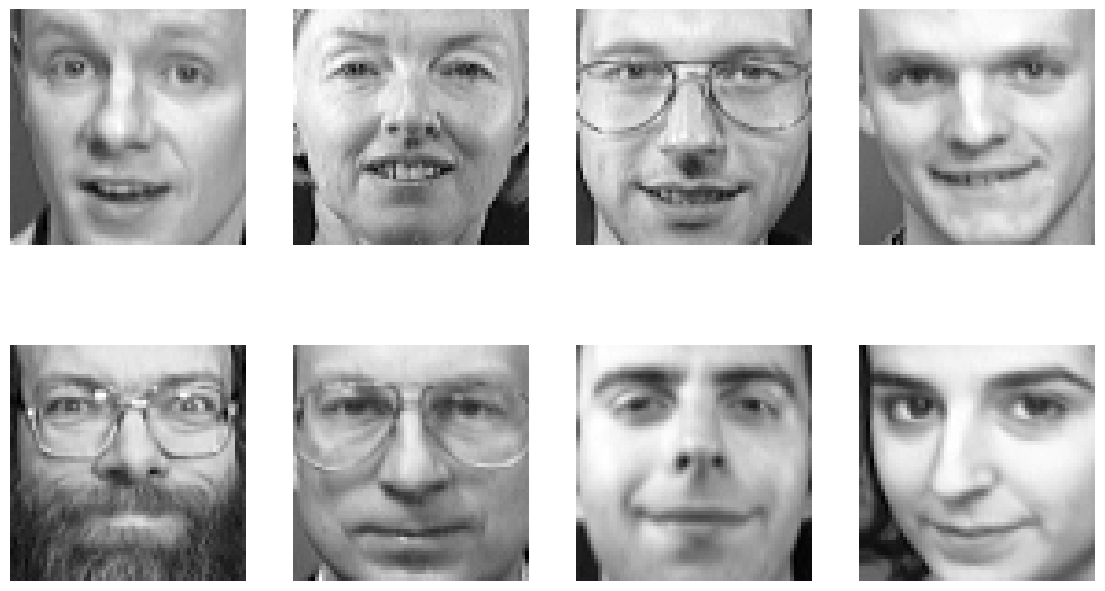

In [5]:
import numpy as np
np.random.seed(21)
idx_rand = np.random.randint(len(X), size=8)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14, 8))
for p, i in enumerate(idx_rand):
    plt.subplot(2, 4, p + 1)
    plt.imshow(X[i, :].reshape((64, 64)), cmap='gray')
    plt.axis('off')

In [6]:
n_samples, n_features = X.shape
X -= X.mean(axis=0)

In [7]:
X -= X.mean(axis=1).reshape(n_samples, -1)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=21
)

In [9]:
import cv2
rtree = cv2.ml.RTrees_create()

In [10]:
num_trees = 50
eps = 0.01
criteria = (cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS,
            num_trees, eps)
rtree.setTermCriteria(criteria)

In [11]:
rtree.setMaxCategories(len(np.unique(y)))

In [12]:
rtree.setMinSampleCount(2)

In [13]:
rtree.setMaxDepth(1000)
rtree.train(X_train, cv2.ml.ROW_SAMPLE, y_train);


In [14]:
rtree.getMaxDepth()

25

In [15]:
_, y_hat = rtree.predict(X_test)

In [17]:
#Random forest: tree-50

from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80         3
         1.0       1.00      1.00      1.00         2
         2.0       1.00      1.00      1.00         2
         3.0       1.00      1.00      1.00         1
         4.0       0.75      1.00      0.86         3
         5.0       1.00      1.00      1.00         4
         6.0       1.00      1.00      1.00         2
         7.0       1.00      1.00      1.00         3
         8.0       1.00      0.50      0.67         2
         9.0       1.00      0.75      0.86         4
        10.0       1.00      1.00      1.00         2
        11.0       1.00      1.00      1.00         2
        12.0       0.00      0.00      0.00         2
        13.0       0.80      1.00      0.89         4
        14.0       1.00      1.00      1.00         3
        15.0       1.00      1.00      1.00         1
        16.0       1.00      1.00      1.00         4
        17.0       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [20]:
#Decision tree

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=21, max_depth=25)
tree.fit(X_train, y_train)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80         3
         1.0       1.00      1.00      1.00         2
         2.0       1.00      1.00      1.00         2
         3.0       1.00      1.00      1.00         1
         4.0       1.00      1.00      1.00         3
         5.0       1.00      1.00      1.00         4
         6.0       1.00      1.00      1.00         2
         7.0       1.00      1.00      1.00         3
         8.0       1.00      1.00      1.00         2
         9.0       1.00      0.75      0.86         4
        10.0       1.00      1.00      1.00         2
        11.0       1.00      1.00      1.00         2
        12.0       1.00      0.50      0.67         2
        13.0       1.00      1.00      1.00         4
        14.0       1.00      1.00      1.00         3
        15.0       1.00      1.00      1.00         1
        16.0       1.00      1.00      1.00         4
        17.0       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
#Random forest: tree-50
num_trees = 100
eps = 0.01
criteria = (cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS,
            num_trees, eps)
rtree.setTermCriteria(criteria)
rtree.train(X_train, cv2.ml.ROW_SAMPLE, y_train);
_, y_hat = rtree.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))




              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80         3
         1.0       1.00      1.00      1.00         2
         2.0       1.00      1.00      1.00         2
         3.0       1.00      1.00      1.00         1
         4.0       1.00      1.00      1.00         3
         5.0       1.00      1.00      1.00         4
         6.0       1.00      1.00      1.00         2
         7.0       1.00      1.00      1.00         3
         8.0       1.00      1.00      1.00         2
         9.0       1.00      0.75      0.86         4
        10.0       1.00      1.00      1.00         2
        11.0       1.00      1.00      1.00         2
        12.0       1.00      0.50      0.67         2
        13.0       1.00      1.00      1.00         4
        14.0       1.00      1.00      1.00         3
        15.0       1.00      1.00      1.00         1
        16.0       1.00      1.00      1.00         4
        17.0       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
